### **图像透视变换**

选择计算透视变换矩阵的方法：
* DECOMP_LU 最佳主轴元素的高斯消元法
* DECOMP_SVD 奇异值分解方法
* DECOMP_EIG 特征值分解方法
* DECOMP_CHOLESKY Cholesky分解法
* DECOMP_QR QR分解法
* DECOMP_NORMAL 使用归一化公式，可以与前面的标志一起使用

本例将相机视角不垂直二维码平面拍摄的图像，通过透视变换，变成相机视角垂直于二维码平面拍摄的图像，且让二维码可以充满全部的图像，因此需要获取到图像中二维码的4个角点坐标和透视变换后角点对应的理想坐标，本例中在noobcvqr.txt文件中给出，实际工程中角点坐标可以通过角点检测方法获取

In [1]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [2]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'noobcvqr.png')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read noobcvqr.png')
    sys.exit

In [3]:
h, w = img.shape[:-1]
size = (w, h)
# 读取透视变换的前4个角点坐标
points_path = '/home/zomnk/python_ws/02-OpenCV4/data/noobcvqr_points.txt'
with open(points_path, 'r') as f:
    src_points = np.array([tx.split(' ') for tx in f.read().split('\n')], dtype='float32')
print(src_points)

[[ 94. 374.]
 [507. 380.]
 [  1. 623.]
 [627. 627.]]


In [4]:
# 设置透视变换后4个角点的坐标
max_pt = np.max(src_points) # 获取最大的角点，以此为基础设置理想角点
dst_points = np.array([[0.0, 0.0], [max_pt, 0.0], [0.0, max_pt], [max_pt, max_pt]], dtype='float32')
# 计算透视变换矩阵
rotation = cv.getPerspectiveTransform(src_points, dst_points)
print('透视变换矩阵为：\n{}'.format(rotation))
# 透视变换投影
img_wrap = cv.warpPerspective(img, rotation, size)

透视变换矩阵为：
[[ 6.45015522e+00  2.40909412e+00 -1.50731579e+03]
 [-2.39750829e-01  1.65028488e+01 -6.14952886e+03]
 [-2.71526156e-04  8.97206349e-03  1.00000000e+00]]


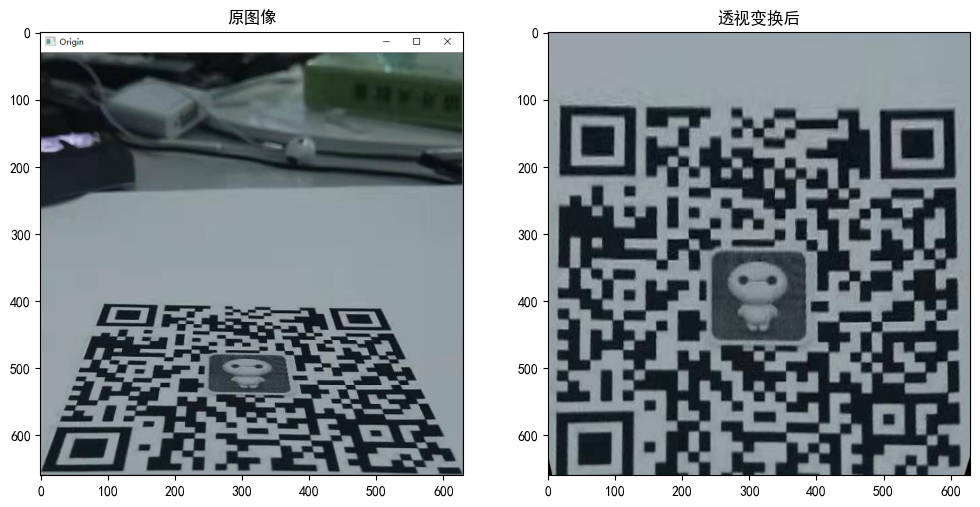

In [5]:
# 展示结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('原图像')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('透视变换后')
plt.imshow(img_wrap)